In [7]:
import pickle

import time
#from collections import deque

#from sklearn.utils import shuffle
#from sklearn.metrics import average_precision_score
#from sklearn.metrics import precision_recall_curve
#from sklearn.metrics import roc_auc_score

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#from multiprocessing import Pool

#from scipy.sparse import lil_matrix, csr_matrix, csc_matrix
#from scipy.sparse import vstack

#import sys

import matplotlib.pyplot as plt
import numpy as np

import importlib
import models
import evaluate
import iterate_train

torch.manual_seed(1)
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = 'cpu'

## データ読み込み

- posi and nega  
- train/test split

In [2]:
posi_data = pickle.load(open('./dataset/posi_data.pickle', 'rb'))
nega_data = pickle.load(open('./dataset/nega_data.pickle', 'rb'))

train_num = int(0.8 * len(posi_data))
train_posi = posi_data[:train_num]
test_posi = posi_data[train_num:]
train_nega = nega_data[:train_num]
test_nega = nega_data[train_num:]

train_data = np.concatenate([train_posi, train_nega])

In [3]:
target_train = np.array([1 for i in range(len(train_posi))] + [0 for i in range(len(train_nega))])
target_test = np.array([1 for i in range(len(test_posi))] + [0 for i in range(len(test_nega))])

- aspect

In [4]:
user_aspect_dict = pickle.load(open('./dataset/aspect/user_aspect_dict.pickle', 'rb'))
item_aspect_dict = pickle.load(open('./dataset/aspect/item_aspect_dict.pickle', 'rb'))

- dict

In [5]:
user2idx = pickle.load(open('./dataset/user_item_dict/user2idx.pickle', 'rb'))
item2idx = pickle.load(open('./dataset/user_item_dict/item2idx.pickle', 'rb'))

epoch: 1
train loss: 3.323451e+00    processed: 12800(34%)    0m0sec
train loss: 3.208327e+00    processed: 25600(69%)    0m0sec
pr_roc :0.7207663266735065
roc_auc :0.4942359682193242


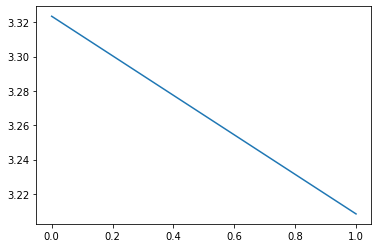

----------------------------------------
epoch: 2
train loss: 3.089029e+00    processed: 12800(34%)    0m0sec
train loss: 2.958017e+00    processed: 25600(69%)    0m0sec


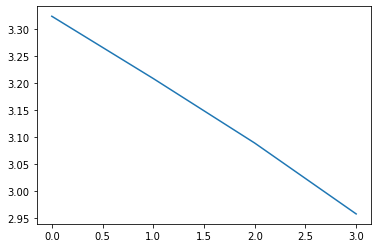

----------------------------------------
epoch: 3
train loss: 2.749272e+00    processed: 12800(34%)    0m0sec
train loss: 2.694439e+00    processed: 25600(69%)    0m0sec


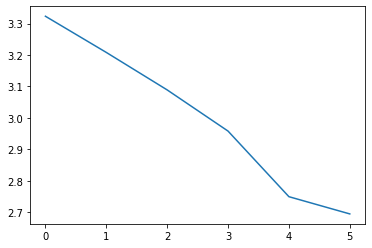

----------------------------------------
epoch: 4
train loss: 2.499177e+00    processed: 12800(34%)    0m0sec
train loss: 2.498337e+00    processed: 25600(69%)    0m0sec


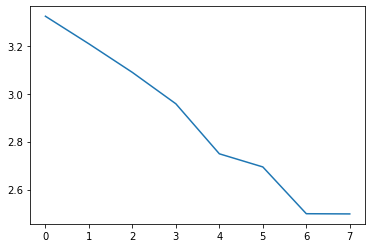

----------------------------------------
epoch: 5
train loss: 2.263972e+00    processed: 12800(34%)    0m0sec
train loss: 2.176641e+00    processed: 25600(69%)    0m0sec


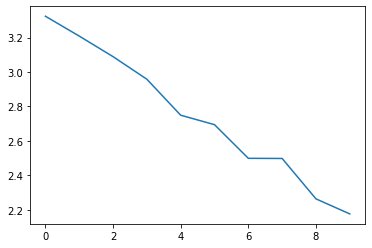

----------------------------------------
epoch: 6
train loss: 2.068787e+00    processed: 12800(34%)    0m0sec
train loss: 1.977175e+00    processed: 25600(69%)    0m0sec
pr_roc :0.718915295831608
roc_auc :0.49222963515177287


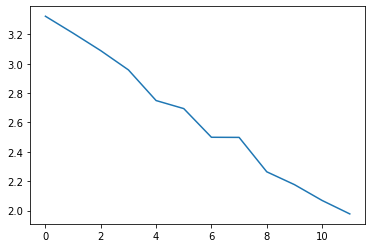

----------------------------------------
epoch: 7
train loss: 1.890313e+00    processed: 12800(34%)    0m0sec
train loss: 1.789065e+00    processed: 25600(69%)    0m0sec


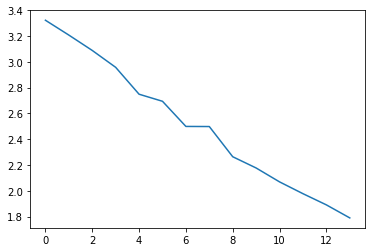

----------------------------------------
epoch: 8
train loss: 1.639744e+00    processed: 12800(34%)    0m0sec
train loss: 1.572850e+00    processed: 25600(69%)    0m0sec


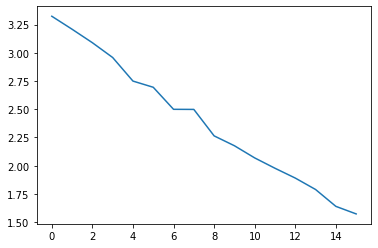

----------------------------------------
epoch: 9
train loss: 1.482275e+00    processed: 12800(34%)    0m0sec
train loss: 1.458509e+00    processed: 25600(69%)    0m0sec


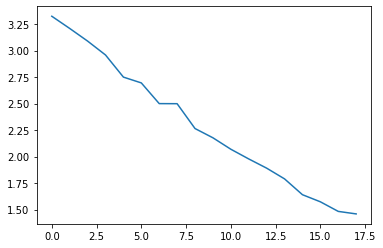

----------------------------------------
epoch: 10
train loss: 1.332588e+00    processed: 12800(34%)    0m0sec
train loss: 1.276909e+00    processed: 25600(69%)    0m0sec


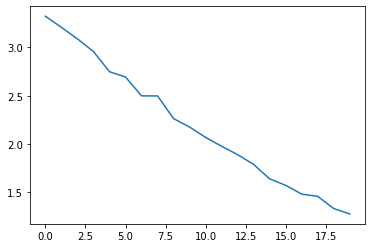

----------------------------------------
epoch: 11
train loss: 1.207619e+00    processed: 12800(34%)    0m0sec
train loss: 1.115212e+00    processed: 25600(69%)    0m0sec


KeyboardInterrupt: 

In [8]:
if __name__ == '__main__':
    # 諸々のサイズ
    batch_size = 128
    # Model 定義
    user_num = len(user2idx) + 1
    item_num = len(item2idx) + 1
    aspect_num = 6
    embed_size1 = 32
    embed_size2 = 32
    model = models.Zhang(user_num, item_num, aspect_num, embed_size1, embed_size2).to(device)
    itrter = iterate_train.Iterater()
    evlt = evaluate.Evalueter(user_num)
    
    epoch = 1000
    evaluate_every = 5 
    n_iter = int(len(train_data) / batch_size)
    loss_list = []
    ndcg_list = []
    lr = 0.001
    decay_every = 10
    for i in range(epoch):
        print('epoch: {}'.format(i+1))
        loss_list.extend(itrter.iterate_train(model, train_data, target_train, user_aspect_dict, item_aspect_dict, n_iter=n_iter, batch_size=batch_size, learning_rate=lr, print_every=100, plot_every=100))
        
        if i % evaluate_every == 0:
            #roc_auc = evaluate_ranking(rnn, metric='roc_auc')
            start = time.time()
            pr_auc, roc_auc = evlt.evaluate_ranking(model, test_posi, test_nega, metric='map')
            #mi, sec = time_since(time.time() - start)
            print('pr_roc :{}'.format(pr_auc))
            print('roc_auc :{}'.format(roc_auc))
            #print('{}m{}sec'.format(mi, sec))
            
            # modelを保存する
            # model_name = 'gru_epoch' + str(i) + '.pickle'
            # with open('./rnn_atten_model/' + model_name, 'wb') as f:
            #    pickle.dump(model, f)
                            
                            
        plt.plot(loss_list)
        plt.show()
        
        if (i+1) % decay_every == 0:
            #lr = lr / 2
            lr = lr * 0.8
        
        print('-'*40)